In [1]:
%cd ../../

/Users/macos/Uni/1st_year/period_3/DSProj


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import euclidean
import scipy.spatial.distance as ssd

In [3]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

## 0. Load data and embedding

In [4]:
path = "/Users/macos/Uni/1st_year/period_3/DSProj/data/AllSites_SiteOccurrences_AllGenera_26.1.24.csv"

df = pd.read_csv(path)

df.head()

,SITE_NAME,Equus,Coelodonta,Bos,Gazella,Ursus,Vulpes,Cervus,Canis,Sus,...,Total_Gen_Count,Large_GenCount,Small_GenCount,smallperlarge,smallprop,Herb_GenCount,Nonherb_GenCount,DietRatio,HerbProp,mid_age
0,Aba Zawei,1,1,1,1,0,0,0,0,0,...,4,4,0,0.0,0.000000,4,0,NaN,1.000000,0.0265
1,Abric Romani,1,0,1,0,1,1,1,1,1,...,12,12,0,0.0,0.000000,6,5,1.2,0.500000,0.0550
2,Acheng_Jiaojie,0,0,0,0,0,0,1,0,0,...,7,5,2,0.4,0.285714,5,2,2.5,0.714286,0.2100
3,Adler cave,1,0,0,0,0,1,0,1,0,...,10,5,5,1.0,0.500000,6,4,1.5,0.600000,0.0275
4,Adyrgan,1,0,0,1,0,0,0,0,0,...,11,5,6,1.2,0.545455,11,0,NaN,1.000000,2.2000


In [8]:
path_embd_site = "code/visualization/embd_site_mf.np.npy"
path_embd_species = "code/visualization/embd_species_mf.np.npy"
path_enc_site = "code/visualization/ordinal_enc_site_mf.np.npy"
path_enc_species = "code/visualization/ordinal_enc_species_mf.np.npy"

emb_site = np.load(path_embd_site)
emb_species = np.load(path_embd_species)
enc_site = np.load(path_enc_site, allow_pickle=True)
enc_species = np.load(path_enc_species, allow_pickle=True)

## 1. Plot dendogram

In [23]:
subset_embd = emb_species[:10,:]
subset_labels = enc_species.squeeze()[:10]

subset_embd.shape

(10, 64)

In [24]:
dist = []

for i in range(subset_embd.shape[0]):
    dist_i = [
        euclidean(subset_embd[i], subset_embd[j])
        for j in range(subset_embd.shape[0])
    ]

    dist.append(dist_i)

Text(0.5, 1.0, "Dendrogram with 'Ward' lingkage")

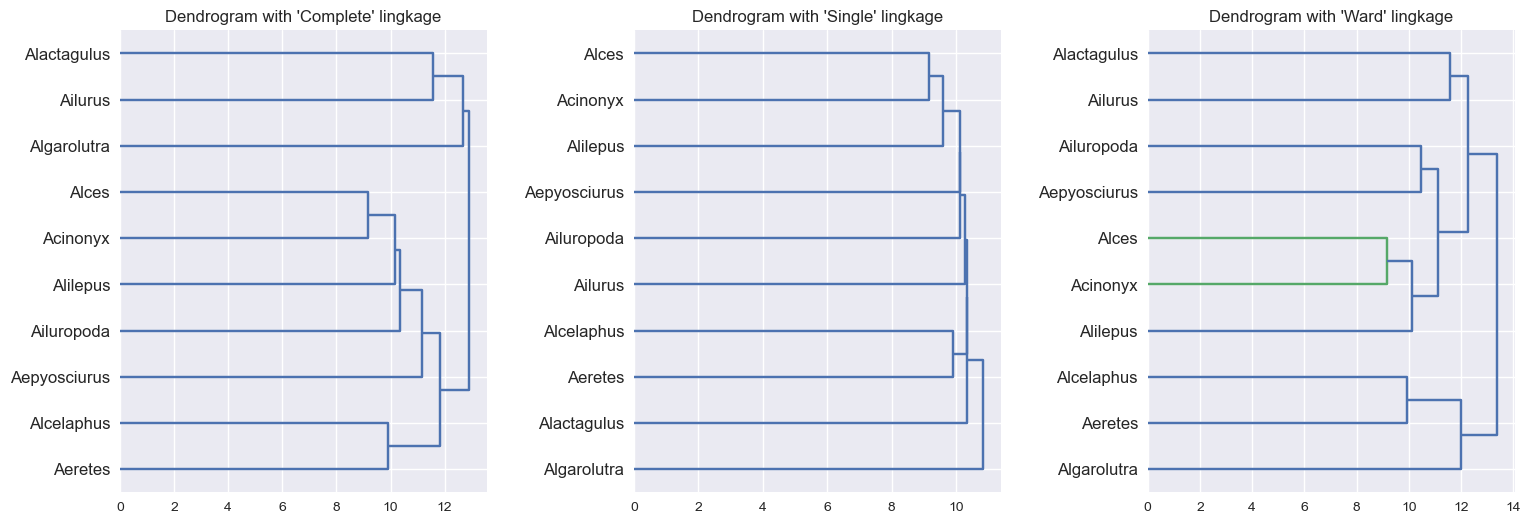

In [33]:
fig = plt.figure(figsize=(18, 6))

fig.subplots_adjust(
    # left=0.1,
    # bottom=0.1, 
    # right=0.9, 
    # top=0.9, 
    wspace=0.4, 
    # hspace=0.4
)

ax = fig.add_subplot(131)
hierarchy.dendrogram(hierarchy.linkage(ssd.squareform(dist), method='complete'), ax=ax, labels=subset_labels, orientation='right')
ax.set_title("Dendrogram with 'Complete' lingkage")

ax = fig.add_subplot(132)
hierarchy.dendrogram(hierarchy.linkage(ssd.squareform(dist), method='single'), ax=ax, labels=subset_labels, orientation='right')
ax.set_title("Dendrogram with 'Single' lingkage")

ax = fig.add_subplot(133)
hierarchy.dendrogram(hierarchy.linkage(ssd.squareform(dist), method='ward'), ax=ax, labels=subset_labels, orientation='right')
ax.set_title("Dendrogram with 'Ward' lingkage")